/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


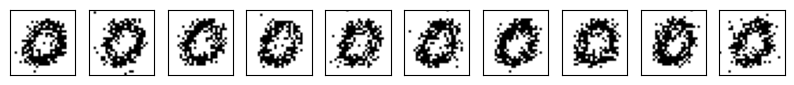

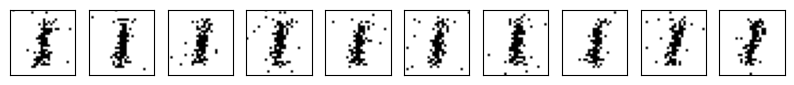

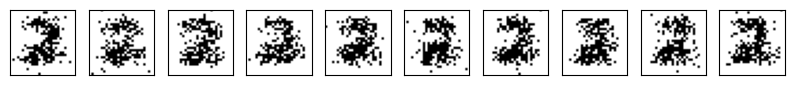

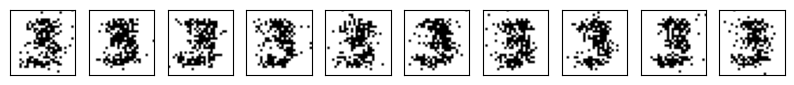

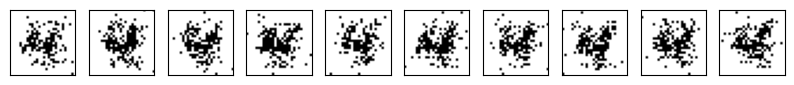

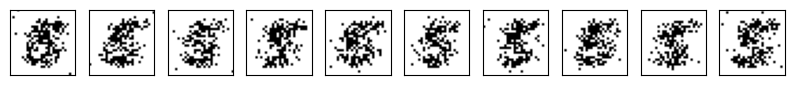

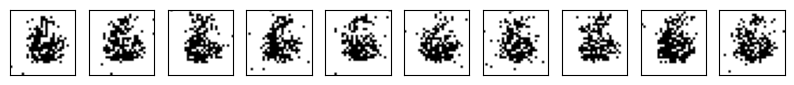

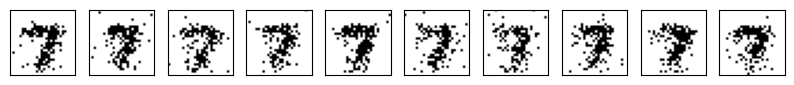

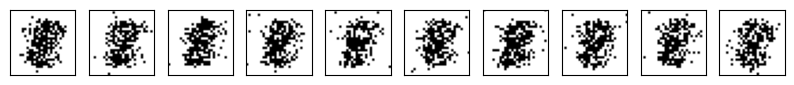

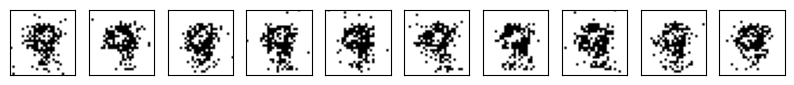

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import BernoulliNB

# Part 1: Imports the first 1000 digits from the MNIST dataset.
X, Y = fetch_openml(name = 'mnist_784', return_X_y = True, cache = False)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X.iloc[shuffle], Y.iloc[shuffle]
train_data, train_labels = X[:1000], Y[:1000]

def main():

  # Part 2: Plots a 10 x 10 grid of digits.
  def plot_digits(x,i,j,figure):
    array = x.reshape(28,28)
    figure.add_subplot(10,10,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(array,cmap = plt.cm.gray_r)

  # Part 3: Calculates the log probabilities.
  def generate(log_probs):
    n = log_probs.shape[0]
    r = np.random.rand(n)
    d = np.zeros(n)
    for i in range(n):
      if r[i] < np.exp(log_probs[i]): d[i] = 1
    return d

  # Part 4: Produces a Bernoulli Naive Bayes model on the dataset.
  bnb_model = BernoulliNB()
  bnb_model.fit(train_data, train_labels)

  # Part 5: Generates 10 examples of each digit (0-9).
  for i in range(10):
    figure = plt.figure(figsize = (10,10))
    for j in range(10):
      x = generate(bnb_model.feature_log_prob_[i])
      plot_digits(x,i,j,figure)

main()